# Investigation of a real-world application of machine learning in healthcare using python

In this lab we will load MRI dataset in Python, inspect and clean  data; filter, pre-process, analyse, and select significant feature that will be used in machine learning model development for diagnosis of Alzhiemer's disease.

The lab will provide practical instructions and examples on the development of robust machine learning models for the purposes of disease classification or diagnosis: data preparation, the creation of machine learning models in python, model training and testing, performance evaluation and k-fold cross-validation.



**Student ID: 10809512**
- Email:    <nikhil.upadhyay@postgrad.plymouth.ac.uk>


**May**, **2023**


# Introduction
Alzheimer's Disease (AD) is the most common neurodegenerative disease. There is no single test for diagnosis of AD, the doctors
rely on medical history, neuropsychological assessments,computed tomography (CT) or magnetic resonance imaging (MRI) scan of the brain, etc. to confirm a diagnosis. In this lab we will first introduce MRI dataset (or any dataset) in Python. This paper
makes use of feature selection techniques to extract the most important features in the diagnosis of AD. A practical introduction to the inspection and cleaning of the data followed by filter, pre-process, analyse, and select significant feature that will be used in the machine learning model development. The lab will then provide practical instructions on the development of robust machine learning models for the purposes of disease classification or diagnosis; data preparation, the creation of machine learning models in python, model training and testing, and performance evaluation.


# Aims and Objectives

The aims of this Lab are to load datasets, create models using different classifiers and evaluate of the performance of machine learning models.


The objectives are as below:

- **Data loading**
  1. import the required libraries for loading data
  2. load MRI dataset 
  3. print the number of samples and number of features in the dataset
  4. print how many samples are Negative and Positive  
  
  
- **Data Inspection**
  1. calculate the mean for each feature for Negative samples ('0')
  2. calculate the mean for each feature for Positive samples ('1')
  3. compare means for Positive and Negative samples
  
  
- **Identify Significant Features from dataset**
  1. calculate p-values for each feature
  2. rank features according to p-value
  3. identify significant features
   
   
- **Modelling** 

  1. Augment the dataset
     - to ensure equal samples per class
     
  2. split the data into 
     - training set
     - testing set 
     
  3. train the following classifiers 
     - LogisticRegression
     - RandomForest
     - Support Vector Machine
     - Naive Bayes
     
  4. Performance Evaluation: For each each clssifier 
     - generate a confusion matrix
     - Calculate 
        - Accuracy
        - Sensitivity
        - Specificity
        - AuC

# Step 1: Data Loading

1. import the required libraries for loading data
2. load 'cwdata.csv' dataset which is and MRI dataset available on DLE under coursework requirement.
3. print the number of samples and number of features in the dataset
4. how many samples are Negative and Positive

## Solution

In [1]:
'''
    1. Import required libraries
'''
import pandas as pd    # for data manipulation and analysis

In [2]:
'''
    2. load 'cancer_dataset_v1.csv' dataset
'''
df=pd.read_csv(r'C:\Users\nmupadhyay\OneDrive - University of Plymouth\Semester 2\MATH516\Lab5\cwdata.csv')

In [3]:
'''
    3. print the number of samples and number of features in the dataset   
'''
numSamples=df.shape[0]
numFeatures=df.shape[1]
print(numSamples, numFeatures)
df.shape

220 17


(220, 17)

In [4]:
df.head()

,RID,BRAIN,EICV,VENTRICLES,LHIPPOC,RHIPPOC,LINFLATVEN,RINFLATVEN,LMIDTEMP,RMIDTEMP,LINFTEMP,RINFTEMP,LFUSIFORM,RFUSIFORM,LENTORHIN,RENTORHIN,DXCURREN
0,1063,937159,1401690,38855.4,3427.13,3262.01,1045.280,1263.010,2.44566,2.48342,2.47434,2.49197,2.27057,2.11083,2.99752,3.24032,0
1,184,901429,1235930,10081.2,3410.35,3693.69,529.756,391.364,2.52101,2.69526,2.81781,2.76115,2.42640,2.50153,3.40556,3.36431,0
2,16,935565,1345440,21299.0,3621.49,3802.43,887.978,1135.170,2.45128,2.53828,2.40015,2.46122,1.99782,2.40015,3.19497,3.02149,0
3,575,884775,1325760,69220.3,2802.91,3098.38,3215.570,3370.800,2.59348,2.62409,2.50552,2.95271,2.09972,2.12354,2.43217,2.99445,0
4,403,1062950,1498230,32967.7,3416.55,4103.49,1648.410,1480.410,2.78544,2.76651,2.71469,2.54695,2.38363,2.48169,3.71762,3.86305,0


In [5]:
'''
    4. how many samples are Negative and Positive
'''
df['DXCURREN'].value_counts()

0    110
1    110
Name: DXCURREN, dtype: int64

# Step 2: Split the data into training and testing dataset

1. calculate the mean for each feature for Negative samples ('0')
2. calculate the mean for each feature for Positive samples ('1')
3. compare means for Positive and Negative samples
4. Comment on results

## Solution

In [6]:
'''
    1. calculate the mean for each feature for Negative samples ('0')
'''
negative_stats=df[df['DXCURREN']==0].describe().T # stats
negative_stats=negative_stats[:-1] # drop last row -- which is the class label stats
negative_means=negative_stats['mean']
negative_means

RID           6.183818e+02
BRAIN         9.963349e+05
EICV          1.458788e+06
VENTRICLES    3.811028e+04
LHIPPOC       3.533096e+03
RHIPPOC       3.678581e+03
LINFLATVEN    1.234751e+03
RINFLATVEN    1.244294e+03
LMIDTEMP      2.564385e+00
RMIDTEMP      2.598034e+00
LINFTEMP      2.620976e+00
RINFTEMP      2.588706e+00
LFUSIFORM     2.389659e+00
RFUSIFORM     2.365876e+00
LENTORHIN     3.186655e+00
RENTORHIN     3.298458e+00
Name: mean, dtype: float64

In [7]:
'''
    2. calculate the mean for each feature for Positive samples ('1')
'''
positive_stats=df[df['DXCURREN']==1].describe().T # stats
positive_stats=positive_stats[:-1] # drop last row -- which is the class label stats
positive_means=positive_stats['mean']
positive_means

RID           7.763818e+02
BRAIN         9.501246e+05
EICV          1.451390e+06
VENTRICLES    5.552915e+04
LHIPPOC       2.762603e+03
RHIPPOC       2.952135e+03
LINFLATVEN    2.249683e+03
RINFLATVEN    2.253310e+03
LMIDTEMP      2.218401e+00
RMIDTEMP      2.258468e+00
LINFTEMP      2.285647e+00
RINFTEMP      2.290316e+00
LFUSIFORM     2.099536e+00
RFUSIFORM     2.104474e+00
LENTORHIN     2.499836e+00
RENTORHIN     2.589077e+00
Name: mean, dtype: float64

In [8]:
'''
    3. compare means for Positive and Negative samples
'''
# create empty dataframe
feat_means=pd.DataFrame()

# add a column named 'features' 
feat_means['features']=negative_stats.index

# add a column for 'neg_means'
feat_means['neg_means']=negative_means.values

# add a column for 'neg_means'
feat_means['pos_means']=positive_means.values

# calculate % fold change between positive and negative
fc=((feat_means['pos_means'] - feat_means['neg_means'])/feat_means['neg_means'])*100

# add fold change column
feat_means['fold_change']=fc

feat_means

,features,neg_means,pos_means,fold_change
0,RID,6.183818e+02,7.763818e+02,25.550557
1,BRAIN,9.963349e+05,9.501246e+05,-4.638028
2,EICV,1.458788e+06,1.451390e+06,-0.507139
3,VENTRICLES,3.811028e+04,5.552915e+04,45.706473
4,LHIPPOC,3.533096e+03,2.762603e+03,-21.807875
5,RHIPPOC,3.678581e+03,2.952135e+03,-19.747989
6,LINFLATVEN,1.234751e+03,2.249683e+03,82.197401
7,RINFLATVEN,1.244294e+03,2.253310e+03,81.091418
8,LMIDTEMP,2.564385e+00,2.218401e+00,-13.491875
9,RMIDTEMP,2.598034e+00,2.258468e+00,-13.070121


 4. Comment on results

Features with bigger absolute feature fold changes may be better features as they provide seperation 

# Step 3: Identify Significant Features from dataset

1. calculate p-values for each feature
2. rank features according to p-value
3. identify significant features

## Solution

In [9]:
'''
    1. Calculate pvalue
'''
from scipy import stats

# copy data
dataset=df

# seperate the two sets of data
a=dataset[dataset['DXCURREN']==0].drop(columns=['DXCURREN'])
b=dataset[dataset['DXCURREN']==1].drop(columns=['DXCURREN'])

# Calculate pvalues using t-test
pvals=(pd.DataFrame(stats.ttest_ind(a,b)).T).drop(columns=[0]).rename(columns={1: "p_value"})
pvals

,p_value
0,4.095462e-03
1,1.464905e-03
2,7.209300e-01
3,1.444776e-07
4,3.110688e-24
5,6.790456e-20
6,7.197735e-15
7,7.144266e-13
8,5.668557e-25
9,2.069136e-25


,feature,p_value
14,LENTORHIN,3.026538e-27
10,LINFTEMP,1.167292e-26
9,RMIDTEMP,2.069136e-25
8,LMIDTEMP,5.668557e-25
15,RENTORHIN,9.028144e-25
4,LHIPPOC,3.110688e-24
12,LFUSIFORM,3.829996e-20
5,RHIPPOC,6.790456e-20
11,RINFTEMP,2.104613e-19
13,RFUSIFORM,9.731913e-18


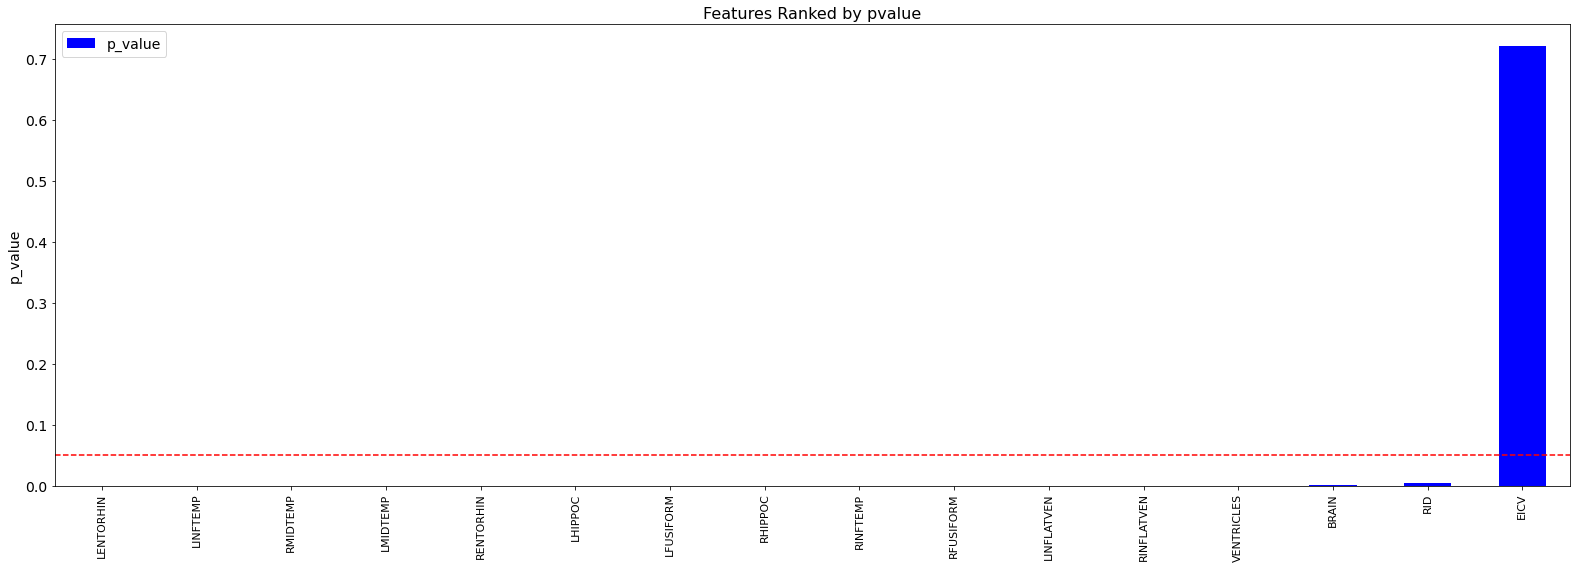

In [10]:
'''
    2. rank features according to p-value
'''
# import plotting library
from matplotlib import pyplot as plt

# create a dataframe 
ranked_pvals=pd.DataFrame()

# add features column
ranked_pvals['feature'] = negative_stats.index

# add pvalue
ranked_pvals['p_value'] = pvals['p_value']

# rank dataframe by pvalue
ranked_pvals=ranked_pvals.sort_values(by=['p_value'])

# plot ranking
ranked_pvals.plot.bar(x='feature', y='p_value', rot=0,figsize=(22,8), color='blue')
plt.xticks(rotation='vertical',fontsize=11)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('p_value',fontsize=14)
plt.legend(fontsize=14)
plt.title('Features Ranked by pvalue',fontsize=16)
plt.axhline(y = 0.05, color = 'r', linestyle = '--')
plt.tight_layout()

ranked_pvals

In [11]:
''' 
    identify significant features
'''
significant_features = ranked_pvals[ranked_pvals.p_value <= 0.05]
significant_features.feature

14     LENTORHIN
10      LINFTEMP
9       RMIDTEMP
8       LMIDTEMP
15     RENTORHIN
4        LHIPPOC
12     LFUSIFORM
5        RHIPPOC
11      RINFTEMP
13     RFUSIFORM
6     LINFLATVEN
7     RINFLATVEN
3     VENTRICLES
1          BRAIN
0            RID
Name: feature, dtype: object

# Step 4: Modelling
- **modelling using all features** 
    - Augment the dataset
        - to ensure equal samples per class
    - split the data into 
        - training set
        - testing set 
    - train the following classifiers 
        - LogisticRegression
        - RandomForest
        - Support Vector Machine
        - Naive Bayes
    - for each each clssifier 
        - generate a confusion matrix
        - Accuracy
        - Sensitivity
        - Specificity
        - AuC


In [2]:
import pandas as pd

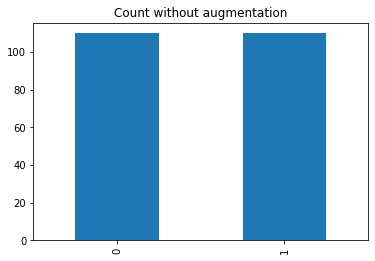

In [3]:
'''
    1. Data Augmentation
'''
# load the data
dataset=pd.read_csv('cwdata.csv')

# Plot distribution of
dataset['DXCURREN'].value_counts().plot(kind='bar', title='Count without augmentation');


0    110
1    110
Name: DXCURREN, dtype: int64


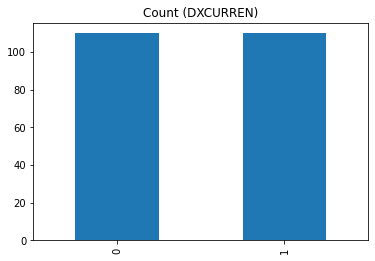

In [4]:
'''
    Augment dataset to get balanced dataset
'''
# Import SMOTE library
from imblearn.over_sampling import SMOTE

# Create a smote object
smt=SMOTE() # create a SMOTE object

# seperate the data and labels
X = dataset.drop(columns=['DXCURREN']) # just the data
y = dataset['DXCURREN'] # just the class values
# y = dataset_under['DXCURREN'] # this syntax also works

'''
    train or fit the SMOTE object 
    use it to oversample the minority class
    generate 
    
    X_sm -- data after oversampling
    y_sm -- labels of oversampled data
'''
X_sm, y_sm=smt.fit_resample(X,y) # oversample

# Concatenate data and labels to get augmented dataset dataset
dataset_sm = pd.concat([X_sm, y_sm], axis=1)

# counts of imbalanced dataset
print(y_sm.value_counts())

# Plot result
dataset_sm['DXCURREN'].value_counts().plot(kind='bar', title='Count (DXCURREN)');


In [9]:
'''
    2. Split the dataset -- dataset_sm
'''
# Import data splitting libraries
from sklearn.model_selection import train_test_split

# 2. split data into training and test sets
X = dataset_sm.drop(columns=['DXCURREN'])
y = dataset_sm['DXCURREN']

# split data into train & test sets: 70% training & 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 


0.8939393939393939 0.9655172413793104 0.8378378378378378 0.8235294117647058 0.9655172413793104


<AxesSubplot:>

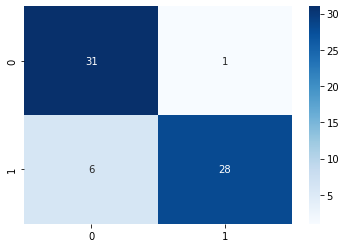

In [10]:
'''
    Create, train, test, and get confusion marix for LogisticRegression Classifier
'''
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

# Create the RandomForest Classifier
lr_classifier = LogisticRegression(random_state=42)

# Fit the classifier to the raining data and training labels
lr_classifier.fit(X_train, y_train)

# Use the trained classifier to predict the labels of the test set
lr_predict = lr_classifier.predict(X_test)

# Get the confusion metrix from predicted labels and actual labels
lr_cf_matrix = confusion_matrix(y_test, lr_predict)

lr_TP=lr_cf_matrix[1,1]
lr_TN=lr_cf_matrix[0,0]
lr_FP=lr_cf_matrix[1,0]
lr_FN=lr_cf_matrix[0,1]

lr_Accuracy = (lr_TP+lr_TN)/(lr_TP+lr_TN+lr_FN+lr_FP)
lr_Sensitivity = lr_TP / (lr_TP + lr_FN)
lr_Specificity = lr_TN / (lr_TN + lr_FP)
lr_Precision = lr_TP / (lr_TP + lr_FP)
lr_Recall = lr_TP / (lr_TP + lr_FN)

print(lr_Accuracy, lr_Sensitivity, lr_Specificity, lr_Precision, lr_Recall)

# Plot confusion matrix
sns.heatmap(lr_cf_matrix, annot=True, fmt='', cmap='Blues')


0.9090909090909091 0.9666666666666667 0.8611111111111112 0.8529411764705882 0.9666666666666667


<AxesSubplot:>

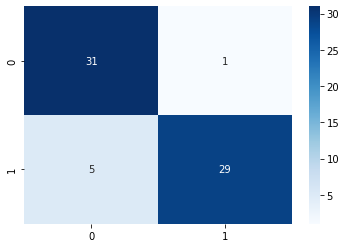

In [11]:
'''
    Create, train, test, and get confusion marix for RandomForest Classifier
'''
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Create the RandomForest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the raining data and training labels
rf_classifier.fit(X_train, y_train)

# Use the trained classifier to predict the labels of the test set
rf_predict = rf_classifier.predict(X_test)

# Get the confusion metrix from predicted labels and actual labels
rf_cf_matrix = confusion_matrix(y_test, rf_predict)

rf_TP=rf_cf_matrix[1,1]
rf_TN=rf_cf_matrix[0,0]
rf_FP=rf_cf_matrix[1,0]
rf_FN=rf_cf_matrix[0,1]

rf_Accuracy = (rf_TP+rf_TN)/(rf_TP+rf_TN+rf_FN+rf_FP)
rf_Sensitivity = rf_TP / (rf_TP + rf_FN)
rf_Specificity = rf_TN / (rf_TN + rf_FP)
rf_Precision = rf_TP / (rf_TP + rf_FP)
rf_Recall = rf_TP / (rf_TP + rf_FN)

print(rf_Accuracy, rf_Sensitivity, rf_Specificity, rf_Precision, rf_Recall)

# Plot confusion matrix
sns.heatmap(rf_cf_matrix, annot=True, fmt='', cmap='Blues')


0.5454545454545454 0.5625 0.5294117647058824 0.5294117647058824 0.5625


<AxesSubplot:>

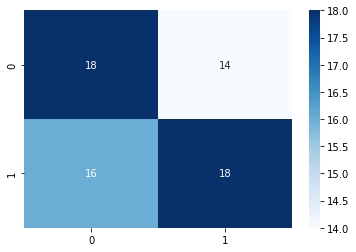

In [12]:
'''
    Create, train, test, and get confusion marix for Support Vector Machine Classifier (SVC)
'''
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

# Create the RandomForest Classifier
svc_classifier = SVC( random_state=42)

# Fit the classifier to the raining data and training labels
svc_classifier.fit(X_train, y_train)

# Use the trained classifier to predict the labels of the test set
svc_predict = svc_classifier.predict(X_test)

# Get the confusion metrix from predicted labels and actual labels
svc_cf_matrix = confusion_matrix(y_test, svc_predict)

svc_TP=svc_cf_matrix[1,1]
svc_TN=svc_cf_matrix[0,0]
svc_FP=svc_cf_matrix[1,0]
svc_FN=svc_cf_matrix[0,1]

svc_Accuracy = (svc_TP+svc_TN)/(svc_TP+svc_TN+svc_FN+svc_FP)
svc_Sensitivity = svc_TP / (svc_TP + svc_FN)
svc_Specificity = svc_TN / (svc_TN + svc_FP)
svc_Precision = svc_TP / (svc_TP + svc_FP)
svc_Recall = svc_TP / (svc_TP + svc_FN)

print(svc_Accuracy, svc_Sensitivity, svc_Specificity, svc_Precision, svc_Recall)



# Plot confusion matrix
sns.heatmap(svc_cf_matrix, annot=True, fmt='', cmap='Blues')


0.6212121212121212 0.6097560975609756 0.64 0.7352941176470589 0.6097560975609756


<AxesSubplot:>

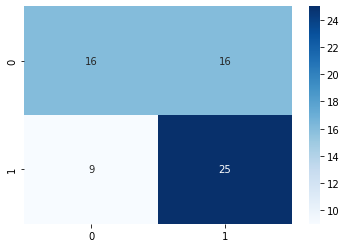

In [13]:
'''
    Create, train, test, and get confusion marix for Neural Network - MLPClassifier
'''
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier as MLP

# Create the RandomForest Classifier
mlp_classifier = MLP(random_state=42)

# Fit the classifier to the raining data and training labels
mlp_classifier.fit(X_train, y_train)

# Use the trained classifier to predict the labels of the test set
mlp_predict = mlp_classifier.predict(X_test)

# Get the confusion metrix from predicted labels and actual labels
mlp_cf_matrix = confusion_matrix(y_test, mlp_predict)

mlp_TP=mlp_cf_matrix[1,1]
mlp_TN=mlp_cf_matrix[0,0]
mlp_FP=mlp_cf_matrix[1,0]
mlp_FN=mlp_cf_matrix[0,1]

mlp_Accuracy = (mlp_TP+mlp_TN)/(mlp_TP+mlp_TN+mlp_FN+mlp_FP)
mlp_Sensitivity = mlp_TP / (mlp_TP + mlp_FN)
mlp_Specificity = mlp_TN / (mlp_TN + mlp_FP)
mlp_Precision = mlp_TP / (mlp_TP + mlp_FP)
mlp_Recall = mlp_TP / (mlp_TP + mlp_FN)

print(mlp_Accuracy, mlp_Sensitivity, mlp_Specificity, mlp_Precision, mlp_Recall)


# Plot confusion matrix
sns.heatmap(mlp_cf_matrix, annot=True, fmt='', cmap='Blues')


0.8484848484848485 0.8333333333333334 0.8666666666666667 0.8823529411764706 0.8333333333333334


<AxesSubplot:>

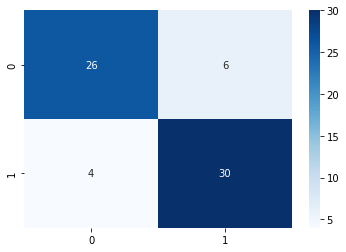

In [14]:
'''
    Create, train, test, and get confusion marix for  Gaussian Naive Bayes - gnb
'''
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB 

# Create the RandomForest Classifier
gnb_classifier = GaussianNB()

# Fit the classifier to the raining data and training labels
gnb_classifier.fit(X_train, y_train)

# Use the trained classifier to predict the labels of the test set
gnb_predict = gnb_classifier.predict(X_test)

# Get the confusion metrix from predicted labels and actual labels
gnb_cf_matrix = confusion_matrix(y_test, gnb_predict)

gnb_TP=gnb_cf_matrix[1,1]
gnb_TN=gnb_cf_matrix[0,0]
gnb_FP=gnb_cf_matrix[1,0]
gnb_FN=gnb_cf_matrix[0,1]

gnb_Accuracy = (gnb_TP+gnb_TN)/(gnb_TP+gnb_TN+gnb_FN+gnb_FP)
gnb_Sensitivity = gnb_TP / (gnb_TP + gnb_FN)
gnb_Specificity = gnb_TN / (gnb_TN + gnb_FP)
gnb_Precision = gnb_TP / (gnb_TP + gnb_FP)
gnb_Recall = gnb_TP / (gnb_TP + gnb_FN)

print(gnb_Accuracy, gnb_Sensitivity, gnb_Specificity, gnb_Precision, gnb_Recall)


# Plot confusion matrix
sns.heatmap(gnb_cf_matrix, annot=True, fmt='', cmap='Blues')


0.8787878787878788 0.9333333333333333 0.8333333333333334 0.8235294117647058 0.9333333333333333


<AxesSubplot:>

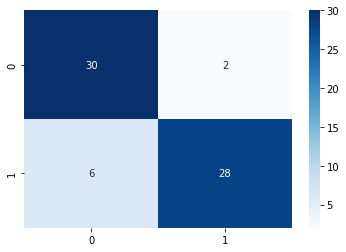

In [15]:
'''
    Create, train, test, and get confusion marix for GradientBoostingClassifier
'''
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier 

# Create the RandomForest Classifier
gbc_classifier = GradientBoostingClassifier(random_state=42)

# Fit the classifier to the raining data and training labels
gbc_classifier.fit(X_train, y_train)

# Use the trained classifier to predict the labels of the test set
gbc_predict = gbc_classifier.predict(X_test)

# Get the confusion metrix from predicted labels and actual labels
gbc_cf_matrix = confusion_matrix(y_test, gbc_predict)

gbc_TP=gbc_cf_matrix[1,1]
gbc_TN=gbc_cf_matrix[0,0]
gbc_FP=gbc_cf_matrix[1,0]
gbc_FN=gbc_cf_matrix[0,1]

gbc_Accuracy = (gbc_TP+gbc_TN)/(gbc_TP+gbc_TN+gbc_FN+gbc_FP)
gbc_Sensitivity = gbc_TP / (gbc_TP + gbc_FN)
gbc_Specificity = gbc_TN / (gbc_TN + gbc_FP)
gbc_Precision = gbc_TP / (gbc_TP + gbc_FP)
gbc_Recall = gbc_TP / (gbc_TP + gbc_FN)

print(gbc_Accuracy, gbc_Sensitivity, gbc_Specificity, gbc_Precision, gbc_Recall)


# Plot confusion matrix
sns.heatmap(gbc_cf_matrix, annot=True, fmt='', cmap='Blues')


In [16]:
'''
    Collate metrics
'''
clfs=['LogisticRegression', 'RandomForest', 'SVC', 'MLPClassifier', 'GaussianNB', 'GradientBoosting']
accuracy=[lr_Accuracy, rf_Accuracy, svc_Accuracy, mlp_Accuracy, gnb_Accuracy, gbc_Accuracy]
sensitivity=[lr_Sensitivity, rf_Sensitivity, svc_Sensitivity, mlp_Sensitivity, gnb_Sensitivity, gbc_Sensitivity]
specificity=[lr_Specificity, rf_Specificity, svc_Specificity, mlp_Specificity, gnb_Specificity, gbc_Specificity]
precision=[lr_Precision, rf_Precision, svc_Precision, mlp_Precision, gnb_Precision, gbc_Precision]
recall=[lr_Recall, rf_Recall, svc_Recall, mlp_Recall, gnb_Recall, gbc_Recall]

cm_based_performance=pd.DataFrame()
cm_based_performance['classifier']=clfs
cm_based_performance['accuracy']=accuracy
cm_based_performance['sensitivity']=sensitivity
cm_based_performance['specificity']=specificity
cm_based_performance['precision']=precision
cm_based_performance['recall']=recall
cm_based_performance

,classifier,accuracy,sensitivity,specificity,precision,recall
0,LogisticRegression,0.893939,0.965517,0.837838,0.823529,0.965517
1,RandomForest,0.909091,0.966667,0.861111,0.852941,0.966667
2,SVC,0.545455,0.562500,0.529412,0.529412,0.562500
3,MLPClassifier,0.621212,0.609756,0.640000,0.735294,0.609756
4,GaussianNB,0.848485,0.833333,0.866667,0.882353,0.833333
5,GradientBoosting,0.878788,0.933333,0.833333,0.823529,0.933333


In [17]:
'''
    Calculate performance metrics
'''
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Accuracy
lr_acc = accuracy_score(y_test, lr_predict)*100 # LogisticRegression
rf_acc = accuracy_score(y_test, rf_predict)*100 # RandomForestClassifier
svc_acc = accuracy_score(y_test, svc_predict)*100 # SVC
mlp_acc = accuracy_score(y_test, mlp_predict)*100 # MLPClassifier
gnb_acc = accuracy_score(y_test, gnb_predict)*100 # GaussianNB
gbc_acc = accuracy_score(y_test, gbc_predict)*100 # GradientBoostingClassifier

# F1 score
lr_f1= f1_score(y_test, lr_predict)# LogisticRegression
rf_f1= f1_score(y_test, rf_predict)# RandomForestClassifi
svc_f1= f1_score(y_test, svc_predict)# SVC
mlp_f1= f1_score(y_test, mlp_predict)# MLPClassifier
gnb_f1= f1_score(y_test, gnb_predict)# GaussianNB
gbc_f1= f1_score(y_test, gbc_predict)# GradientBoostingClassifier

# Precision
lr_precision=precision_score(y_test, lr_predict)# LogisticRegression
rf_precision=precision_score(y_test, rf_predict)# RandomForestClassifi
svc_precision=precision_score(y_test, svc_predict)# SVC
mlp_precision=precision_score(y_test, mlp_predict)# MLPClassifier
gnb_precision=precision_score(y_test, gnb_predict)# GaussianNB
gbc_precision=precision_score(y_test, gbc_predict)# GradientBoostingClassifier

# Recall
lr_recall=recall_score(y_test, lr_predict)# LogisticRegression
rf_recall=recall_score(y_test, rf_predict)# RandomForestClassifi
svc_recall=recall_score(y_test, svc_predict)# SVC
mlp_recall=recall_score(y_test, mlp_predict)# MLPClassifier
gnb_recall=recall_score(y_test, gnb_predict)# GaussianNB
gbc_recall=recall_score(y_test, gbc_predict)# GradientBoostingClassifier

classifiers=['LogisticRegression', 'RandomForest', 'SVC', 'MLPClassifier', 'GaussianNB', 'GradientBoosting']
accuracies=[lr_acc, rf_acc, svc_acc, mlp_acc, gnb_acc, gbc_acc]
f1=[lr_f1, rf_f1, svc_f1, mlp_f1, gnb_f1, gbc_f1]
precision=[lr_precision, rf_precision, svc_precision, mlp_precision, gnb_precision, gbc_precision]
recall=[lr_recall, rf_recall, svc_recall, mlp_recall, gnb_recall, gbc_recall]

# create a performance dataframe
sklearn_based_performance=pd.DataFrame()

# Add column for classifiers
sklearn_based_performance['classifiers']=classifiers

# Add column for accuracies
sklearn_based_performance['accuracies']=accuracies

# Add column for accuracies
#perf['f1']=f1

# print performances
sklearn_based_performance['precision']=precision
        
# print performances
sklearn_based_performance['recall']=recall
        
sklearn_based_performance


,classifiers,accuracies,precision,recall
0,LogisticRegression,89.393939,0.965517,0.823529
1,RandomForest,90.909091,0.966667,0.852941
2,SVC,54.545455,0.562500,0.529412
3,MLPClassifier,62.121212,0.609756,0.735294
4,GaussianNB,84.848485,0.833333,0.882353
5,GradientBoosting,87.878788,0.933333,0.823529


## Feature scaling

- Datasets may have features that in most cases are of different scales
- some features may be very big while some may be small in value
- big-valued features may dominate small-valued fetures when used to train a ML model
- to avoid dominance, all features should be to the same range e.g. 0 - 1; -1 - 1; -3 - 3; etc.


**Scale training data**

NB: pre-processing on training dataset

In [18]:
# Import preprocessing library
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# we only aply the feature scaling on the features other than dummy variables.
X_train_sc = sc.fit_transform(X_train)

**Confirm scaling**

by printing the scaled dataset

In [19]:
# Confirm scaling of the train data

# uncomment line below to see data
pd.DataFrame(X_train_sc, columns=[X.columns])

,RID,BRAIN,EICV,VENTRICLES,LHIPPOC,RHIPPOC,LINFLATVEN,RINFLATVEN,LMIDTEMP,RMIDTEMP,LINFTEMP,RINFTEMP,LFUSIFORM,RFUSIFORM,LENTORHIN,RENTORHIN
0,1.308691,-1.049667,-0.862268,-0.913529,-0.718681,-0.642200,-0.811906,-0.633197,-0.380317,-1.134599,-0.196026,-0.952874,-0.462308,-0.457076,-0.553351,-1.098685
1,0.017159,0.225568,-0.137731,-1.256237,0.881814,0.644299,-0.900409,-0.916731,0.299939,0.046493,0.672618,0.279993,0.675497,1.066337,0.936816,0.508515
2,0.116317,0.027290,0.994690,2.766680,0.420169,0.250944,1.866445,2.936483,-2.971027,-2.057152,-1.586701,-1.141185,-1.511570,-1.416499,-0.633686,-0.019468
3,1.516923,-1.100959,-1.075280,-0.650665,-0.987745,-1.153370,-0.320542,0.085028,-0.413553,-1.961611,-0.649639,-1.269681,-0.141198,-2.471456,-0.672529,-1.754882
4,1.519402,-0.963456,-0.916688,-0.107237,-0.562254,-0.667263,-0.442619,-0.484433,1.009681,0.143600,1.400739,0.479917,1.806527,1.655191,-0.606953,-0.424398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1.514444,2.476506,1.423316,-1.271533,1.893166,1.486462,-0.812276,-0.827053,1.392003,1.105091,1.424191,1.834490,2.208710,2.002135,0.995110,1.003673
150,-1.380967,1.360624,0.708984,-0.982122,1.109919,0.925258,-0.838434,-0.752495,0.657712,0.451166,0.618187,1.066926,1.174594,0.984723,1.809829,1.466996
151,-0.434009,1.299744,0.732326,-0.823582,0.562430,0.577774,-0.943737,-0.852025,1.379350,1.850403,0.859437,0.950452,0.948763,2.146158,0.260317,0.887536
152,-0.795935,-0.765390,0.248479,2.242830,-2.136669,-1.311172,3.427284,3.829611,-2.511815,-2.368980,-3.060124,-2.667705,-2.751310,-1.550733,-1.976189,-2.032279


# Feature Selection
- Filter Methods
    - Stats
      - numerical
          - Spearman's Rank Correlation
    - feature importance
- Wrapper Methods
    - RFE -- Recursive Feature Elimination

Sscikit-learn has many different **Filter Methods** methods 
- SelectKBest 
  - Select K best. features
  
- SelectPercentile 
  - Select Top percentile

In [20]:
'''
    SelectKBest
'''
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

feats=[]
acc=[]
sens=[]
spec=[]
for i in range (1,X.columns.shape[0]+1):
    # define feature selection
    fs = SelectKBest(score_func=f_classif, k=i)


    # apply feature selection
    X_selected = fs.fit_transform(X, y)

    cols_idxs = fs.get_support(indices=True)
    selected_features = X.iloc[:,cols_idxs].columns
    
    # Create the GradientBoostingClassifier 
    clf = GradientBoostingClassifier(random_state=42)

    # Fit the classifier to the raining data and training labels
    clf.fit(X_train[selected_features], y_train)

    # Use the trained classifier to predict the labels of the test set
    y_pred = clf.predict(X_test[selected_features])

    # Get the confusion metrix from predicted labels and actual labels
    cf_matrix = confusion_matrix(y_test, y_pred)

    TP=cf_matrix[1,1]
    TN=cf_matrix[0,0]
    FP=cf_matrix[1,0]
    FN=cf_matrix[0,1]

    Accuracy = (TP+TN)/(TP+TN+FN+FP)
    Sensitivity = TP / (TP + FN)
    Specificity = TN / (TN + FP)
    Precision = TP / (TP + FP)
    Recall = TP / (TP + FN)

    #print(Accuracy,Sensitivity,Specificity)
    
    feats.append(selected_features)
    acc.append(Accuracy)
    sens.append(Sensitivity)
    spec.append(Specificity)
    
selected_features_per=pd.DataFrame()
selected_features_per['num']=list(range(1,len(sens)+1))
selected_features_per['Accuracy']=acc
selected_features_per['Sensitivity']=sens
selected_features_per['Specificity']=spec
selected_features_per['avgSensSpec']=(selected_features_per.Sensitivity+selected_features_per.Specificity)/2
selected_features_per

,num,Accuracy,Sensitivity,Specificity,avgSensSpec
0,1,0.696970,0.769231,0.650000,0.709615
1,2,0.787879,0.812500,0.764706,0.788603
2,3,0.848485,0.852941,0.843750,0.848346
3,4,0.848485,0.875000,0.823529,0.849265
4,5,0.833333,0.870968,0.800000,0.835484
5,6,0.878788,0.906250,0.852941,0.879596
6,7,0.863636,0.903226,0.828571,0.865899
7,8,0.878788,0.933333,0.833333,0.883333
8,9,0.878788,0.933333,0.833333,0.883333
9,10,0.878788,0.933333,0.833333,0.883333


In [24]:
import matplotlib.pyplot as plt
import numpy as np

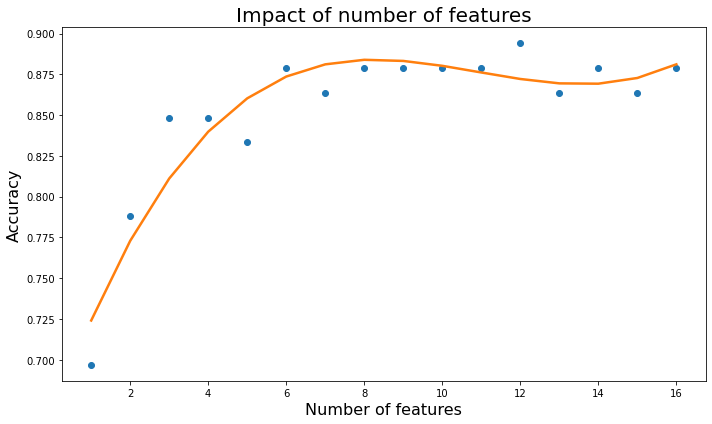

In [25]:
x=selected_features_per.num
y=selected_features_per.Accuracy
plt.figure(figsize=(10,6))
p = np.poly1d( np.polyfit(x, y, 3) )
t = selected_features_per.num
plt.plot(x, y, 'o', t, p(t), '-', lw=2.5)
plt.title('Impact of number of features', fontsize=20)
plt.xlabel('Number of features', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.tight_layout()
